<a href="https://colab.research.google.com/github/pharringtonp19/presidential-policies/blob/main/notebooks/Clinton/ClintonFedFunds.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import datetime as dt
from google.colab import userdata
from matplotlib import font_manager
import matplotlib.dates as mdates
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib import rcParams
rcParams['image.interpolation'] = 'nearest'
rcParams['image.cmap'] = 'viridis'
rcParams['axes.grid'] = False
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [4]:
start, end = dt.datetime(1989, 1, 1), dt.datetime(2001, 12, 31)

# CPI (monthly index)
fedfunds = web.DataReader("FEDFUNDS", "fred", start, end)


print(fedfunds.head(30))

            FEDFUNDS
DATE                
1989-01-01      9.12
1989-02-01      9.36
1989-03-01      9.85
1989-04-01      9.84
1989-05-01      9.81
1989-06-01      9.53
1989-07-01      9.24
1989-08-01      8.99
1989-09-01      9.02
1989-10-01      8.84
1989-11-01      8.55
1989-12-01      8.45
1990-01-01      8.23
1990-02-01      8.24
1990-03-01      8.28
1990-04-01      8.26
1990-05-01      8.18
1990-06-01      8.29
1990-07-01      8.15
1990-08-01      8.13
1990-09-01      8.20
1990-10-01      8.11
1990-11-01      7.81
1990-12-01      7.31
1991-01-01      6.91
1991-02-01      6.25
1991-03-01      6.12
1991-04-01      5.91
1991-05-01      5.78
1991-06-01      5.90


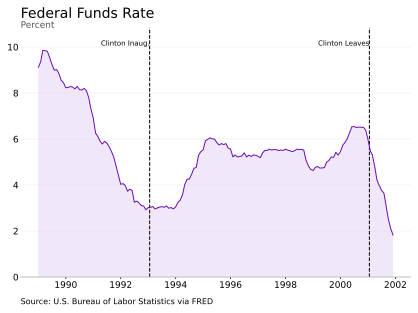

In [5]:
x, y = fedfunds.index, fedfunds['FEDFUNDS']

# --- NYT-style colors ---
line_color     = "#6a0dad"  # deep purple (main line)
fill_color     = "#e6d7f5"  # light lavender fill
forecast_fill  = "#d8bdf0"  # medium lavender for forecast shading
grid_color     = "#f0e6f9"  # very light purple-gray for grid

fig, ax = plt.subplots(figsize=(7, 4.5), dpi=300)
ax.set_facecolor("white")
fig.patch.set_facecolor("white")

# area + line
ax.fill_between(x, 0, y, color=fill_color, linewidth=0, zorder=1, alpha=0.6)
ax.yaxis.grid(True, color=grid_color, linewidth=.5, zorder=2)
ax.plot(x, y, color=line_color, linewidth=1, zorder=3,
        solid_capstyle="round", solid_joinstyle="round")

# spines & ticks (keep only a subtle bottom spine)
for side in ("top", "left", "right"):
    ax.spines[side].set_visible(False)
ax.spines["bottom"].set_color("#bdbdbd")
ax.spines["bottom"].set_linewidth(1)

ax.tick_params(axis="x", length=2, labelsize=9, pad=2)
ax.tick_params(axis="y", length=0, labelsize=9, pad=2)

# tidy limits
ax.set_ylim(0, max(y)*1.10)
ax.set_axisbelow(True)            # any future gridlines stay behind

# title + subtitle (left-aligned)
ax.text(0., 1.04, s='Federal Funds Rate', transform=ax.transAxes, size=14)
ax.text(0, 1.00, "Percent", transform=ax.transAxes,
        fontsize=9, color="#555555")

ax.annotate("Source: U.S. Bureau of Labor Statistics via FRED",
        xy = (0., -0.1),
        xycoords='axes fraction',
        ha='left',
        va="center",
        fontsize=8)

# Reagan's presidency
clinton_start = dt.datetime(1993, 1, 20)
clinton_end   = dt.datetime(2001, 1, 20)

# Vertical lines
ax.axvline(clinton_start, color="black", linestyle="--", linewidth=1)
ax.text(clinton_start, ax.get_ylim()[1]*0.95, "Clinton Inaug.", rotation=0,
        va="top", ha="right", fontsize=7, color="black")

ax.axvline(clinton_end, color="black", linestyle="--", linewidth=1)
ax.text(clinton_end, ax.get_ylim()[1]*0.95, "Clinton Leaves", rotation=0,
        va="top", ha="right", fontsize=7, color="black")

fig.savefig("clinton_fed_funds.png", bbox_inches="tight", dpi=300)
plt.show()